In [1]:
import pandas as pd
import sklearn as skl
import plotly
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import tensorflow as tf
import keras_tuner as kt
import psycopg2

In [2]:
gdpwb_df = pd.read_csv('gdpwb.csv')

In [3]:
medals_df = pd.read_csv('olympic_medals.csv')

In [4]:
medals_df.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,https://olympics.com/en/athletes/fatima-galvez,Fatima GALVEZ,Spain,ES,ESP
1,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,https://olympics.com/en/athletes/alberto-ferna...,Alberto FERNANDEZ,Spain,ES,ESP
2,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,https://olympics.com/en/athletes/alessandra-pe...,Alessandra PERILLI,San Marino,SM,SMR
3,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,https://olympics.com/en/athletes/gian-marco-berti,Gian Marco BERTI,San Marino,SM,SMR
4,Shooting,tokyo-2020,Trap Mixed Team,Mixed,BRONZE,GameTeam,United States of America,https://olympics.com/en/athletes/madelynn-ann-...,Madelynn Ann BERNAU,United States of America,US,USA


In [5]:
gdpwb_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [6]:
gdpwb_df = gdpwb_df.drop(['Indicator Name', 'Indicator Code'], 1)

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [7]:
gdpwb_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [8]:
gdpwb_melt = gdpwb_df.melt(id_vars=['Country Name','Country Code'], 
             value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
                var_name='year',
                value_name='gdp')

In [9]:
gdpwb_melt[gdpwb_melt['Country Name']=='Aruba']

,Country Name,Country Code,year,gdp
0,Aruba,ABW,1960,NaN
266,Aruba,ABW,1961,NaN
532,Aruba,ABW,1962,NaN
798,Aruba,ABW,1963,NaN
1064,Aruba,ABW,1964,NaN
...,...,...,...,...
14896,Aruba,ABW,2016,2.983637e+09
15162,Aruba,ABW,2017,3.092430e+09
15428,Aruba,ABW,2018,3.202189e+09
15694,Aruba,ABW,2019,NaN


In [10]:
gdpwb_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [11]:
pop_df = pd.read_csv('population.csv', skiprows = 4)

In [12]:
pop_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [13]:
pop_df = pop_df.drop(['Indicator Name', 'Indicator Code'], 1)

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [14]:
pop_df.columns

Index(['Country Name', 'Country Code', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [15]:
pop_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [16]:
pop_melt = pop_df.melt(id_vars=['Country Name','Country Code'], 
             value_vars=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
                var_name='year',
                value_name='population')

In [17]:
gdp_pop_df = pd.merge(pop_melt, gdpwb_melt,
                        on=  ['Country Name','Country Code', 'year'],
                        how = 'left')
gdp_pop_df.head(100)

,Country Name,Country Code,year,population,gdp
0,Aruba,ABW,1960,54208.0,NaN
1,Africa Eastern and Southern,AFE,1960,130836765.0,1.931311e+10
2,Afghanistan,AFG,1960,8996967.0,5.377778e+08
3,Africa Western and Central,AFW,1960,96396419.0,1.040428e+10
4,Angola,AGO,1960,5454938.0,NaN
...,...,...,...,...,...
95,High income,HIC,1960,759783611.0,1.065825e+12
96,"Hong Kong SAR, China",HKG,1960,3075605.0,1.320797e+09
97,Honduras,HND,1960,2038636.0,3.356500e+08
98,Heavily indebted poor countries (HIPC),HPC,1960,161734348.0,1.741892e+10


In [18]:
hosts_df = pd.read_csv('hosts_cleaned.csv')
hosts_df.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,tokyo-2020,2021-08-08,2021-07-23,Japan,Tokyo 2020,Summer,2020
1,pyeongchang-2018,2018-02-25,2018-02-08,Republic of Korea,PyeongChang 2018,Winter,2018
2,rio-2016,2016-08-21,2016-08-05,Brazil,Rio 2016,Summer,2016
3,sochi-2014,2014-02-23,2014-02-07,Russian Federation,Sochi 2014,Winter,2014
4,london-2012,2012-08-12,2012-07-27,Great Britain,London 2012,Summer,2012


In [ ]:
#medals_gdp_pop = pd.merge(hosts_df, gdp_pop_df,
                        #left_on=  ['game_location'],
                        #right_on= ['Country Name'],
                        #how = 'left')
#gdp_merged_df.head()

In [19]:
olympics_results = pd.merge(hosts_df, medals_df,
                           left_on=  ['game_slug'],
                           right_on= ['slug_game'],
                           how = 'left')
olympics_results.head(10)
olympics_results.columns

Index(['game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year', 'discipline_title',
       'slug_game', 'event_title', 'event_gender', 'medal_type',
       'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [20]:
clean_olympics_results= olympics_results.drop(['game_slug', 'game_end_date', 'game_start_date','game_name',  'slug_game', 'event_title', 'participant_title',  'athlete_url','athlete_full_name', 'country_code','country_3_letter_code'], 1)
clean_olympics_results.columns

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Index(['game_location', 'game_season', 'game_year', 'discipline_title',
       'event_gender', 'medal_type', 'participant_type', 'country_name'],
      dtype='object')

In [21]:
olympic_wb = pd.merge(clean_olympics_results, gdp_pop_df,
                        left_on=  ['game_location'],
                        right_on= ['Country Name'],
                        how = 'left')
olympic_wb.head()

,game_location,game_season,game_year,discipline_title,event_gender,medal_type,participant_type,country_name,Country Name,Country Code,year,population,gdp
0,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1960,93216000.0,4.430734e+10
1,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1961,94055000.0,5.350862e+10
2,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1962,94933000.0,6.072302e+10
3,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1963,95900000.0,6.949813e+10
4,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1964,96903000.0,8.174901e+10


In [22]:
olympic_wb.shape

(1008430, 13)

In [23]:
#drop null values
olympic_wb.dropna()

,game_location,game_season,game_year,discipline_title,event_gender,medal_type,participant_type,country_name,Country Name,Country Code,year,population,gdp
0,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1960,93216000.0,4.430734e+10
1,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1961,94055000.0,5.350862e+10
2,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1962,94933000.0,6.072302e+10
3,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1963,95900000.0,6.949813e+10
4,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1964,96903000.0,8.174901e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008425,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2016,10775971.0,1.930170e+11
1008426,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2017,10754679.0,1.993508e+11
1008427,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2018,10732882.0,2.119459e+11
1008428,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2019,10721582.0,2.051442e+11


In [ ]:
olympic_wb.shape

In [ ]:
#olympic_dfpd.set_option('display.float_format', lambda x: '%.5f' % x)


In [24]:
olympic_wb= olympic_wb.replace([np.inf, -np.inf], np.nan)

In [26]:
olympic_wb.dropna()

,game_location,game_season,game_year,discipline_title,event_gender,medal_type,participant_type,country_name,Country Name,Country Code,year,population,gdp
0,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1960,93216000.0,4.430734e+10
1,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1961,94055000.0,5.350862e+10
2,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1962,94933000.0,6.072302e+10
3,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1963,95900000.0,6.949813e+10
4,Japan,Summer,2020,Shooting,Mixed,GOLD,GameTeam,Spain,Japan,JPN,1964,96903000.0,8.174901e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008425,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2016,10775971.0,1.930170e+11
1008426,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2017,10754679.0,1.993508e+11
1008427,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2018,10732882.0,2.119459e+11
1008428,Greece,Summer,1896,Weightlifting,Men,BRONZE,Athlete,Greece,Greece,GRC,2019,10721582.0,2.051442e+11


In [27]:
olympic_wb.dtypes

game_location        object
game_season          object
game_year             int64
discipline_title     object
event_gender         object
medal_type           object
participant_type     object
country_name         object
Country Name         object
Country Code         object
year                 object
population          float64
gdp                 float64
dtype: object

In [28]:
# condensing columns: game location and country name
olympic_wb["game_location"].replace({"Russian Federation": "Russia",
                        "Soviet Union": "Russia",
                        "Unified team": "Russia",
                        "West Germany": "Germany",
                        "East Germany": "Germany",
                        "German Democratic Republic (Germany)": "Germany",
                        "Federal Republic of Germany": "Germany",
                        "Australia, Sweden" : "Australia",
                        "USSR" : "Russia"}, inplace=True)

olympic_wb["country_name"].replace({"Russian Federation": "Russia",
                        "Soviet Union": "Russia",
                        "Unified team": "Russia",
                        "West Germany": "Germany",
                        "East Germany": "Germany",
                        "German Democratic Republic (Germany)": "Germany",
                        "Federal Republic of Germany": "Germany",
                        "Australia, Sweden" : "Australia",
                        "USSR" : "Russia"}, inplace=True)

In [29]:
# binning countries
country_counts = olympic_wb.country_name.value_counts()
country_counts.head(30)

United States of America      153543
Germany                        86619
Russia                         74831
France                         46472
Great Britain                  41841
People's Republic of China     39670
Italy                          39125
Sweden                         32249
Australia                      29723
Canada                         29014
Norway                         28450
Japan                          27749
Netherlands                    24663
Finland                        24241
Hungary                        22935
Switzerland                    20187
Austria                        19432
Republic of Korea              18083
Romania                        15223
Poland                         15044
Cuba                           11879
Denmark                        10852
Spain                          10102
Brazil                          8700
Belgium                         8688
Unified Team                    8601
Ukraine                         8438
B

(0.0, 160000.0)

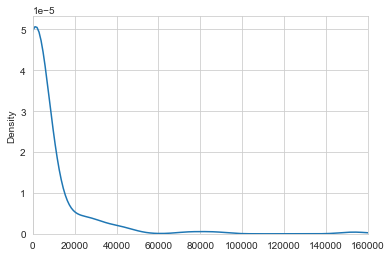

In [30]:
# checking density
sns.set_style('whitegrid')
gfg = sns.kdeplot(np.array(country_counts))
gfg.set_xlim(0, 160000)

In [31]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 10000].index)

# Replace in DataFrame
for country in replace_countries:
    olympic_wb.country_name = olympic_wb.country_name.replace(country,"Other")


# Check to make sure binning was successful
olympic_wb.country_name.value_counts()

Other                         186503
United States of America      153543
Germany                        86619
Russia                         74831
France                         46472
Great Britain                  41841
People's Republic of China     39670
Italy                          39125
Sweden                         32249
Australia                      29723
Canada                         29014
Norway                         28450
Japan                          27749
Netherlands                    24663
Finland                        24241
Hungary                        22935
Switzerland                    20187
Austria                        19432
Republic of Korea              18083
Romania                        15223
Poland                         15044
Cuba                           11879
Denmark                        10852
Spain                          10102
Name: country_name, dtype: int64

In [32]:
location_counts = olympic_wb.game_location.value_counts()
location_counts

United States        170922
Japan                123647
Greece                70028
Canada                65941
Brazil                64843
China                 63684
France                63013
Australia             62881
Spain                 54107
Italy                 50935
Mexico                33611
Finland               28365
Belgium               27877
Germany               27775
Netherlands           20191
Russia                19824
Sweden                19703
Norway                16348
Austria               14457
Switzerland            7198
Great Britain          1823
Republic of Korea      1128
Yugoslavia              129
Name: game_location, dtype: int64

(0.0, 200000.0)

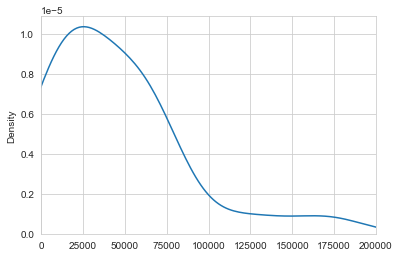

In [33]:
#checking density
sns.set_style('whitegrid')
gfg = sns.kdeplot(np.array(location_counts))
gfg.set_xlim(0, 200000)

In [34]:
# Determine which values to replace
replace_locations = list(country_counts[country_counts < 1000].index)

# Replace in DataFrame
for country in replace_locations:
    olympic_wb.game_location = olympic_wb.game_location.replace(country,"Other")


# Check to make sure binning was successful
olympic_wb.game_location.value_counts()

United States        170922
Japan                123647
Greece                70028
Canada                65941
Brazil                64843
China                 63684
France                63013
Australia             62881
Spain                 54107
Italy                 50935
Mexico                33611
Finland               28365
Belgium               27877
Germany               27775
Netherlands           20191
Russia                19824
Sweden                19703
Norway                16348
Austria               14457
Switzerland            7198
Great Britain          1823
Republic of Korea      1128
Yugoslavia              129
Name: game_location, dtype: int64

In [35]:
titles = olympic_wb.discipline_title.value_counts()
titles

Athletics            141376
Swimming              80843
Wrestling             60094
Rowing                49068
Boxing                44736
                      ...  
Canoe Marathon           36
Short Track              24
Rackets                  10
Water Motorsports         3
Jeu de Paume              3
Name: discipline_title, Length: 86, dtype: int64

(0.0, 150000.0)

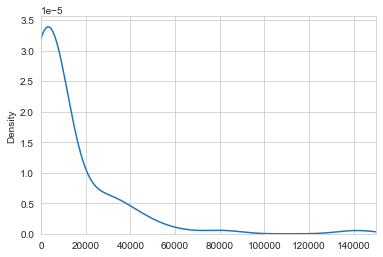

In [36]:
#checking density
sns.set_style('whitegrid')
gfg = sns.kdeplot(np.array(titles))
gfg.set_xlim(0, 150000)

In [37]:
# Determine which values to replace
title_replacements = list(titles[titles < 10000].index)

# Replace in DataFrame
for discipline in title_replacements:
    olympic_wb.discipline_title = olympic_wb.discipline_title.replace(discipline,"Other")


# Check to make sure binning was successful
olympic_wb.discipline_title.value_counts()

Other                   180582
Athletics               141376
Swimming                 80843
Wrestling                60094
Rowing                   49068
Boxing                   44736
Gymnastics Artistic      44119
Shooting                 40589
Canoe Sprint             35598
Sailing                  35569
Fencing                  31388
Weightlifting            31158
Speed skating            30569
Judo                     28687
Cross Country Skiing     28432
Cycling Track            26790
Alpine Skiing            25061
Diving                   21880
Figure skating           20123
Tennis                   16786
Biathlon                 12913
Bobsleigh                11797
Badminton                10272
Name: discipline_title, dtype: int64

In [38]:
# Generate our categorical variable list
olympics_cat = olympic_wb.dtypes[olympic_wb.dtypes == "object"].index.tolist()

In [39]:
# Check the number of unique values in each column
olympic_wb[olympics_cat].nunique()

game_location       23
game_season          2
discipline_title    23
event_gender         4
medal_type           3
participant_type     2
country_name        24
Country Name        20
Country Code        20
year                61
dtype: int64

In [40]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(olympic_wb[olympics_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(olympics_cat)
encode_df.head()

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,game_location_Australia,game_location_Austria,game_location_Belgium,game_location_Brazil,game_location_Canada,game_location_China,game_location_Finland,game_location_France,game_location_Germany,game_location_Great Britain,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
encode_df.columns

Index(['game_location_Australia', 'game_location_Austria',
       'game_location_Belgium', 'game_location_Brazil', 'game_location_Canada',
       'game_location_China', 'game_location_Finland', 'game_location_France',
       'game_location_Germany', 'game_location_Great Britain',
       ...
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'year_2018', 'year_2019', 'year_2020', 'year_nan'],
      dtype='object', length=185)

In [42]:
# Merge one-hot encoded features and drop the originals
olympic_wb = olympic_wb.merge(encode_df,left_index=True, right_index=True)
olympic_wb = olympic_wb.drop(olympics_cat,1)
olympic_wb.head()

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,game_year,population,gdp,game_location_Australia,game_location_Austria,game_location_Belgium,game_location_Brazil,game_location_Canada,game_location_China,game_location_Finland,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_nan
0,2020,93216000.0,4.430734e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,94055000.0,5.350862e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,94933000.0,6.072302e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,95900000.0,6.949813e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,96903000.0,8.174901e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# splitting 

y = olympic_wb["medal_type_GOLD"]
X = olympic_wb.drop(['medal_type_BRONZE', 'medal_type_GOLD',
       'medal_type_SILVER'],1)
# Reshape y to vertical
#y = y.reshape(-1,1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\15129\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [44]:
X

,game_year,population,gdp,game_location_Australia,game_location_Austria,game_location_Belgium,game_location_Brazil,game_location_Canada,game_location_China,game_location_Finland,...,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_nan
0,2020,93216000.0,4.430734e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,94055000.0,5.350862e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,94933000.0,6.072302e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,95900000.0,6.949813e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,96903000.0,8.174901e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008425,1896,10775971.0,1.930170e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1008426,1896,10754679.0,1.993508e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1008427,1896,10732882.0,2.119459e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1008428,1896,10721582.0,2.051442e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
pipeline= Pipeline([
   ('scaler',StandardScaler()),
    ('pca', PCA()),
  # ('clf',RandomForestClassifier(n_estimators=5,max_depth=1,min_samples_leaf=3, max_features=6, random_state=42))

     ('clf',RandomForestClassifier(n_estimators=120, random_state=42))
])
pipeline.fit(X_train,y_train)

#Predicting y for X_val
y_pred = pipeline.predict(X)
cm = confusion_matrix(y,y_pred)
#sns.heatmap(cm/np.sum(cm), annot=True, 
            #fmt='.2%', cmap='coolwarm')

group_names = ['True Neg', 'False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,
            cmap='coolwarm', fmt='')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.savefig('Gold_Medal_Confusion_Matrix.png')